In [2]:
import pandas as pd

In [3]:
macro_data = pd.read_csv('Canadian-GDP-Unemployment-Data.csv')

In [4]:
macro_data.head()

,Date,GDP,UNEMP
0,1961.01,343577,NaN
1,1961.02,352261,NaN
2,1961.03,360748,NaN
3,1961.04,365775,NaN
4,1962.01,375481,NaN


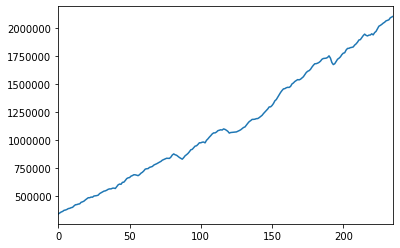

In [6]:
macro_data['GDP'].plot()

In [20]:
macro_data['GDP_Growth'] = macro_data['GDP'].pct_change()

In [21]:
macro_data.head()

,Date,GDP,UNEMP,GDP_Growth
0,1961.01,343577,NaN,NaN
1,1961.02,352261,NaN,0.025275
2,1961.03,360748,NaN,0.024093
3,1961.04,365775,NaN,0.013935
4,1962.01,375481,NaN,0.026535


In [22]:
macro_data['UNEMP_Change'] = macro_data['UNEMP'].pct_change()

In [23]:
macro_data.head()

,Date,GDP,UNEMP,GDP_Growth,UNEMP_Change
0,1961.01,343577,NaN,NaN,NaN
1,1961.02,352261,NaN,0.025275,NaN
2,1961.03,360748,NaN,0.024093,NaN
3,1961.04,365775,NaN,0.013935,NaN
4,1962.01,375481,NaN,0.026535,NaN


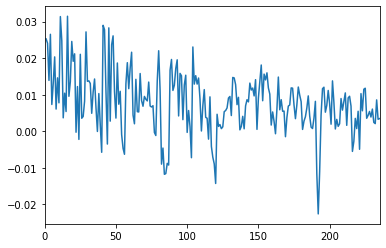

In [24]:
macro_data['GDP_Growth'].plot()

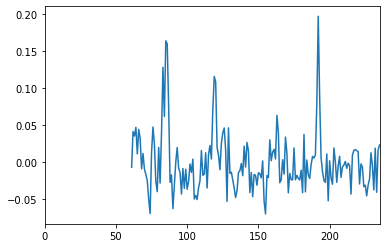

In [25]:
macro_data['UNEMP_Change'].plot()

In [29]:
macro_data['U1'] = macro_data['UNEMP_Change'].shift(1) # first lag of unemployment

In [30]:
macro_data.tail() # see end of dataaset to make sure we correctly lagged UNEMP_Change

,Date,GDP,UNEMP,GDP_Growth,UNEMP_Change,U1
231,2018.04,2070133,5.673588,0.002441,-0.037461,-0.004235
232,2019.01,2074494,5.780928,0.002107,0.018919,-0.037461
233,2019.02,2092327,5.545867,0.008596,-0.040661,0.018919
234,2019.03,2099200,5.636725,0.003285,0.016383,-0.040661
235,2019.04,2106492,5.767707,0.003474,0.023237,0.016383


In [31]:
# Generate remaining three lags of UNEMP_Change
macro_data['U2'] = macro_data['UNEMP_Change'].shift(2) 
macro_data['U3'] = macro_data['UNEMP_Change'].shift(3)
macro_data['U4'] = macro_data['UNEMP_Change'].shift(4)

# Generate four lags of GDP_Growth
macro_data['G1'] = macro_data['GDP_Growth'].shift(1)
macro_data['G2'] = macro_data['GDP_Growth'].shift(2)
macro_data['G3'] = macro_data['GDP_Growth'].shift(3)
macro_data['G4'] = macro_data['GDP_Growth'].shift(4)

In [32]:
macro_data.tail()

,Date,GDP,UNEMP,GDP_Growth,UNEMP_Change,U1,U2,U3,U4,G1,G2,G3,G4
231,2018.04,2070133,5.673588,0.002441,-0.037461,-0.004235,0.012761,-0.022776,-0.031052,0.006080,0.003906,0.005434,0.004353
232,2019.01,2074494,5.780928,0.002107,0.018919,-0.037461,-0.004235,0.012761,-0.022776,0.002441,0.006080,0.003906,0.005434
233,2019.02,2092327,5.545867,0.008596,-0.040661,0.018919,-0.037461,-0.004235,0.012761,0.002107,0.002441,0.006080,0.003906
234,2019.03,2099200,5.636725,0.003285,0.016383,-0.040661,0.018919,-0.037461,-0.004235,0.008596,0.002107,0.002441,0.006080
235,2019.04,2106492,5.767707,0.003474,0.023237,0.016383,-0.040661,0.018919,-0.037461,0.003285,0.008596,0.002107,0.002441


In [33]:
import statsmodels.api as sm

In [34]:
macro_data = sm.add_constant(macro_data)

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
macro_data = macro_data.dropna()

In [36]:
macro_data.head()

,const,Date,GDP,UNEMP,GDP_Growth,UNEMP_Change,U1,U2,U3,U4,G1,G2,G3,G4
65,1.0,1977.02,762578,7.843624,0.005372,0.011253,0.047159,0.035432,0.041525,-0.006798,0.014220,0.002061,0.004453,0.021638
66,1.0,1977.03,766612,8.191982,0.005290,0.044413,0.011253,0.047159,0.035432,0.041525,0.005372,0.014220,0.002061,0.004453
67,1.0,1977.04,778733,8.455303,0.015811,0.032144,0.044413,0.011253,0.047159,0.035432,0.005290,0.005372,0.014220,0.002061
68,1.0,1978.01,785281,8.379502,0.008409,-0.008965,0.032144,0.044413,0.011253,0.047159,0.015811,0.005290,0.005372,0.014220
69,1.0,1978.02,790668,8.478423,0.006860,0.011805,-0.008965,0.032144,0.044413,0.011253,0.008409,0.015811,0.005290,0.005372


In [41]:
adrl_model = sm.OLS(macro_data['UNEMP_Change'],macro_data[['const','U1','G1']]).fit()

In [42]:
adrl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           UNEMP_Change   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     53.41
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           1.11e-18
Time:                        21:04:43   Log-Likelihood:                 347.67
No. Observations:                 171   AIC:                            -689.3
Df Residuals:                     168   BIC:                            -679.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.004      3.556      0.000       0.006       0.020
U1             0.3044      0.076      4.016      0.000       0.155       0.454
G1            -2.1876      0.428     -5.113      0.000      -3.032      -1.343
==============================================================================
Omnibus:                       27.324   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.805
Skew:                           0.806   Prob(JB):                     6.86e-11
Kurtosis:                       4.993   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
0.0126+0.3044*0.023237-2.1876*0.003474

0.012073620399999999

In [45]:
macro_data.tail()

,const,Date,GDP,UNEMP,GDP_Growth,UNEMP_Change,U1,U2,U3,U4,G1,G2,G3,G4
231,1.0,2018.04,2070133,5.673588,0.002441,-0.037461,-0.004235,0.012761,-0.022776,-0.031052,0.006080,0.003906,0.005434,0.004353
232,1.0,2019.01,2074494,5.780928,0.002107,0.018919,-0.037461,-0.004235,0.012761,-0.022776,0.002441,0.006080,0.003906,0.005434
233,1.0,2019.02,2092327,5.545867,0.008596,-0.040661,0.018919,-0.037461,-0.004235,0.012761,0.002107,0.002441,0.006080,0.003906
234,1.0,2019.03,2099200,5.636725,0.003285,0.016383,-0.040661,0.018919,-0.037461,-0.004235,0.008596,0.002107,0.002441,0.006080
235,1.0,2019.04,2106492,5.767707,0.003474,0.023237,0.016383,-0.040661,0.018919,-0.037461,0.003285,0.008596,0.002107,0.002441


In [46]:
5.767707*(1+0.012073620399999999)

5.837344104896423